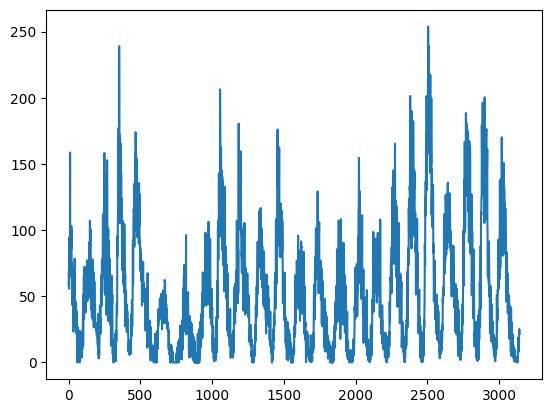

In [113]:
# Exercise 7.1: Detecting Periodicity

import numpy as np
from numpy import *

#a. 

import matplotlib.pyplot as plt
import csv

sunspotsx = loadtxt("sunspots.txt",delimiter='\t',usecols=0)

sunspots = loadtxt("sunspots.txt",delimiter='\t',usecols=1)

nmonths = sunspots.size

fig, ax = plt.subplots()  # Create a figure containing a single axes.

ax.plot(sunspotsx,sunspots, '')

(0.0, 100.0)

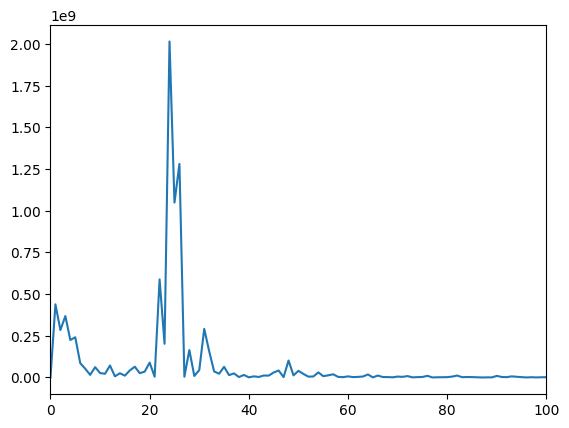

In [115]:
#b. 
import numpy as np
from numpy import *

import matplotlib.pyplot as plt
import csv

sptx = loadtxt("sunspots.txt",delimiter='\t',usecols=0)
spty = loadtxt("sunspots.txt",delimiter='\t',usecols=1)

N = len(sptx)

# This code is mine

# def gamma(spty,k): # Assumes equally spaced points
#     N = len(sptx)
#     gammaterms = [spty[n] * exp(-1j * (2 * pi * k * n)/N) for n in range(len(spty)-1)]
#     return  1/N * sum(gammaterms)



# I took this code from the book. I added the conjugate line so that it returns the full transform

def dft(y): 
    N = len(y)
    c = zeros(N, complex)
    for k in range(N//2 + 1): 
        for n in range(N): 
            c[k] += y[n]* exp(-2j*pi*k*n/N)
    for k in range(N//2 + 1,N): 
        c[k] = conjugate(c[N-k])
    return c

#Plotting
k = sptx
yi= dft(spty)
y = array([absolute(i)**2 for i in yi])
if (argmax(y) == 0):
    y[0] = 0
fig,ax = plt.subplots()
ax.plot(k,y)
plt.xlim(0,100)

In [32]:
#c. 

sptx = loadtxt("sunspots.txt",delimiter='\t',usecols=0)
spty = loadtxt("sunspots.txt",delimiter='\t',usecols=1)


def dft(y): 
    N = len(y)
    c = zeros(N//2 + 1, complex)
    for k in range(N//2 + 1): 
        for n in range(N): 
            c[k] += y[n]* exp(-2j*pi*k*n/N)
    return c
k = sptx
yi= dft(spty)
y = array([absolute(i)**2 for i in yi])

print(y)
if argmax(y) == 0: 
    y[0] = 0
print(max(y))
print(argmax(y))

[2.66338157e+10 4.38551689e+08 2.84356855e+08 ... 1.89583208e+05
 7.46220529e+05 1.14646920e+06]
2014337126.32208
24


2014337126.322072
24


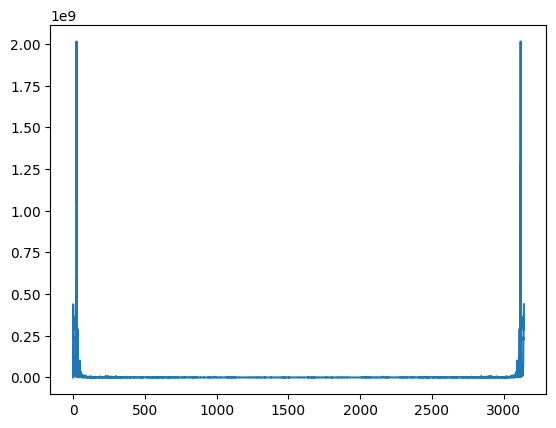

In [119]:
#d. 
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
import csv

from scipy.fft import fft

sptx = loadtxt("sunspots.txt",delimiter='\t',usecols=0)
spty = loadtxt("sunspots.txt",delimiter='\t',usecols=1)

yi = fft(spty)
y = [absolute(i)**2 for i in yi]
if argmax(y) == 0: 
    y[0] = 0
print(max(y))
print(argmax(y))

fig,ax = plt.subplots()
ax.plot(sptx,y)

LinregressResult(slope=0.14043255836563653, intercept=301.03060795388325, rvalue=0.990609914659588, pvalue=0.0, stderr=0.0007613870494479361, intercept_stderr=0.35407240323877)
Co2 in 2100 is  535.9742780995932  ppm


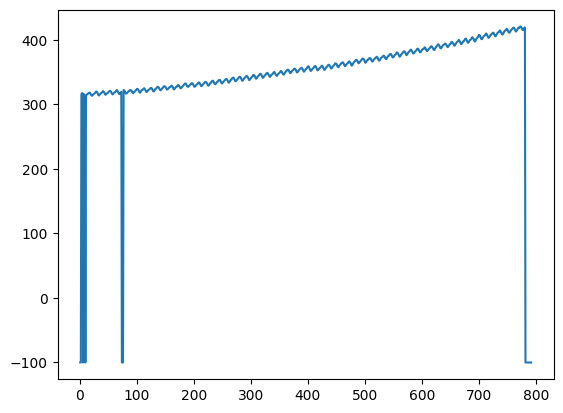

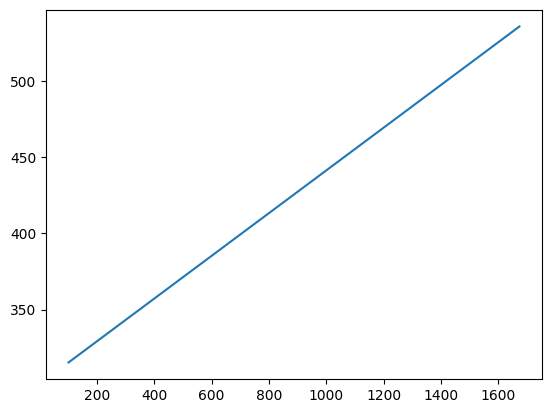

In [63]:
# Exercise 7.2: Detecting Periodicity in CO2 data
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
import csv
import scipy as sp
#a. 

x = linspace(1,792,792)
y = loadtxt("monthly_in_situ_co2_mlo.csv",skiprows=60,usecols=4,delimiter=",")

fig,ax = plt.subplots()
ax.plot(x,y)

# Uh... I'm going to just ignore the first 100 items for now

x = x[100:750]
y = y[100:750]

    
fig,ax = plt.subplots()
ax.plot(x,y)

#b. 

reg = sp.stats.linregress(x,y)
print(reg)
m = reg[0]
b = reg[1]

def fitline(x): 
    return m * x + b

fig,ax2 = plt.subplots()
moremonths = 924
xlater = append(x,x[-1] + range(1,924))
ax2.plot(xlater,fitline(xlater))

print("Co2 in 2100 is ",fitline(xlater[-1]), " ppm")

In [24]:
#c. 

from scipy.fft import fft

x = linspace(1,792,792)
y = loadtxt("monthly_in_situ_co2_mlo.csv",skiprows=60,usecols=4,delimiter=",")

yf = fft(y)

1190


UnboundLocalError: local variable 'i' referenced before assignment

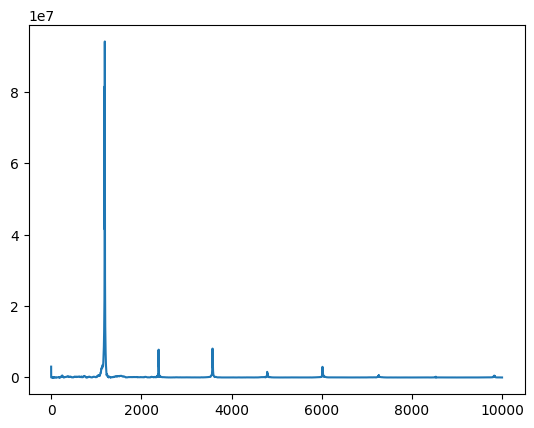

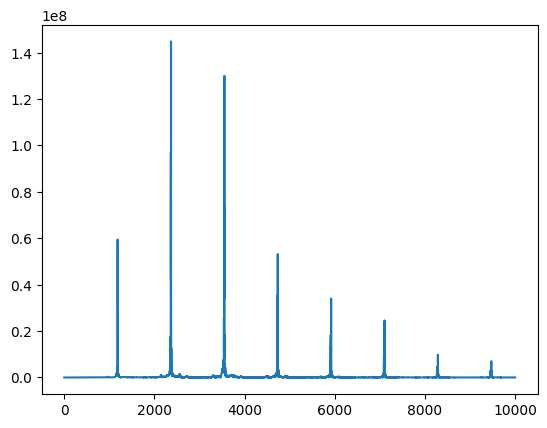

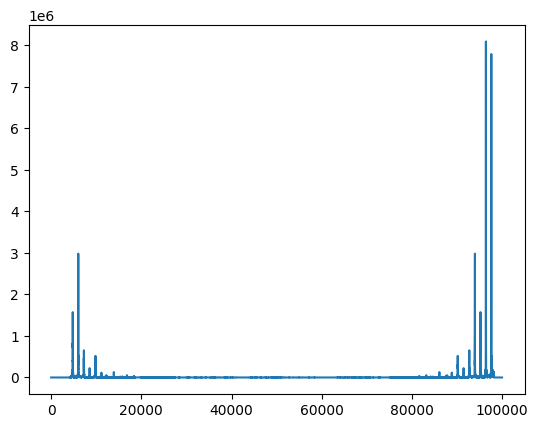

In [94]:
# Exercise 7.3 Fourier Transforms of Musical Instruments

# Write a program that loads a waveform from one of these files, plots it, then calculates
# its discrete Fourier transform and plots the magnitudes of the first 10 000 coefficients in a
# manner similar to Fig. 7.4. Note that you will have to use a fast Fourier transform for the
# calculation because there are too many samples in the files to do the transforms the slow
# way in any reasonable amount of time.

import scipy as sp
from numpy import *
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
import numpy as np

p = loadtxt("piano.txt")
t = loadtxt("trumpet.txt")

def fftplot(data,title): 
    transform = sp.fft.fft(data)
    transform = transform[0:10000]
    transformmag = [abs(i) for i in transform]
    x = range(0,len(transform))
    fig,ax = plt.subplots()
    ax.plot(x,transformmag)
    plt.title=title
    return ax,transformmag


def filt1(data): 
    transform = sp.fft.fft(data)
    transformmag = [abs(i) for i in transform]    
    maxindex = transformmag.index(max(transformmag))
    print(maxindex)
    for i in range(-3000,3000): 
        transform[maxindex+i] = 0
        transformmag[maxindex + i] = 0
    fig,ax = plt.subplots()
    ax.plot(x,transformmag)
    return sp.fft.ifft(transform).real,ax

def filt2(data): 
    transform = sp.fft.fft(data)
    transformmag = [abs(i) for i in transform]  
    nshift = 100/i
    for i in range(1000,len(transform)-nshift): 
        transform[i] = transform[i+nshift]
    return sp.fft.ifft(transform).real

fftplot(p,"Piano")
fftplot(t,"Trumpet")

pfilter,ax = filt1(p)
pfilter2 = filt2(p)
print(pfilter2)

scaled = np.int16(p / np.max(np.abs(p)) * 32767)
write('piano.wav', rate, scaled)


scaled = np.int16(t / np.max(np.abs(t)) * 32767)
write('trumpet.wav', rate, scaled)

rate = 44100
# data = np.random.uniform(-1, 1, rate) # 1 second worth of random samples between -1 and 1
scaled = np.int16(pfilter / np.max(np.abs(pfilter)) * 32767)
write('piano1.wav', rate, scaled)
scaled = np.int16(pfilter2 / np.max(np.abs(pfilter2)) * 32767)
write('piano2.wav', rate, scaled)

In [108]:
# Exercise 7.4: Fourier filtering and smoothing

# In the on-line resources you’ll find a file called dow.txt. It contains the daily closing value for
# each business day from late 2006 until the end of 2010 of the Dow Jones Industrial Average,
# which is a measure of average prices on the US stock market.

# a

# a) Read in the data from dow.txt and plot them on a graph.

import numpy as np
from numpy import *

stocks = loadtxt("dow.txt")
day = range(0,len(stocks))

fig,stockplot = plt.subplots()
stockplot.plot(day,stocks)


Length of the transform is  513
51


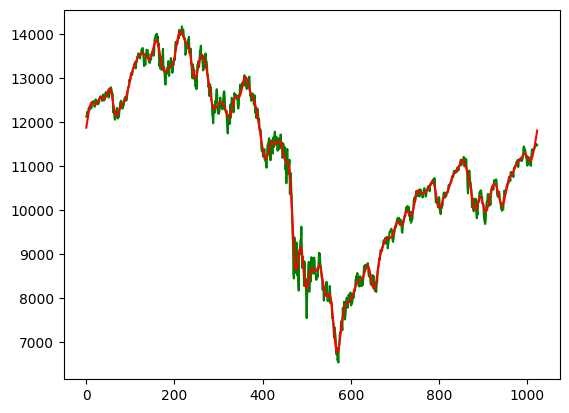

In [111]:
#b) Calculate the coefficients of the discrete Fourier transform of the data using the function
# rfft from numpy.fft, which produces an array of 1/2 (N) + 1 complex numbers.

from numpy.fft import rfft,irfft
c = rfft(stocks)

firstten = len(c)//10
print("Length of the transform is ",len(c))

print(firstten)
for i in range(firstten,len(c)): 
    c[i] = 0

newstocks = irfft(c)

fig,StocksVsDays = plt.subplots()
StocksVsDays.plot(day,stocks,color='green')
StocksVsDays.plot(day,newstocks,color='red')

Length of the transform is  513
10


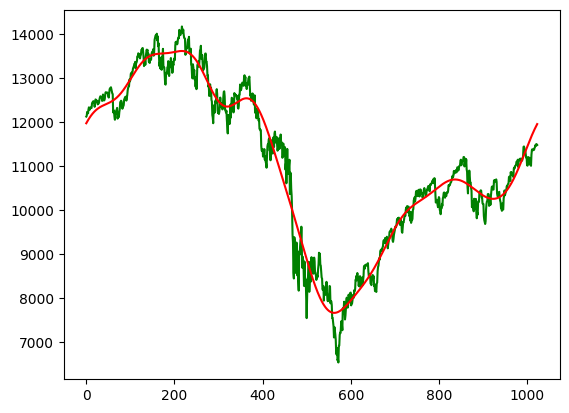

In [112]:
# e) Modify your program so that it sets all but the first 2% of the coefficients to zero and run
# it again.

from numpy.fft import rfft,irfft
c = rfft(stocks)

firstten = len(c)//50
print("Length of the transform is ",len(c))

print(firstten)
for i in range(firstten,len(c)): 
    c[i] = 0

newstocks = irfft(c)

fig,StocksVsDays = plt.subplots()
StocksVsDays.plot(day,stocks,color='green')
StocksVsDays.plot(day,newstocks,color='red')